In [1]:
import pandas as pd
import os
#https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af
#https://github.com/JustAnotherArchivist/snscrape

# Scrape tweets and download

In [30]:
def download_tweets(user, num_tweets=100):
    os.system("snscrape --jsonl --max-results {num_tweets} twitter-search 'from:{user}'> tweets\\{user}-{num_tweets}.json".format(user=user, num_tweets=num_tweets))
#download_tweets(user="ZelenskyyUa", num_tweets=1000)
#download_tweets(user="FedorovMykhailo", num_tweets=1000)

In [30]:
def read_tweets():
    # Reads the json generated from the CLI commands above and creates a pandas dataframe
    tweets_df = pd.read_json("C:\\Users\\adder\\Documents\\Minerva\\CCP Ukraine\\social-media-ukraine\\tweets\\ZelenskyyUa-1000.json", lines=True)
    print(tweets_df.columns)
    print(len(tweets_df))
    long_sentence = ""
    for row in range(len(tweets_df)):
        long_sentence += tweets_df.iloc[row].content
        if tweets_df.iloc[row].hashtags is not None:
            print(tweets_df.iloc[row])
        # print()
    # for row in range(len(tweets_df)):
    #     print(tweets_df[row].content)
    return long_sentence

tweets_df = pd.read_json("tweets\\{user}-1000.json".format(user="ZelenskyyUa"), lines=True)
print(tweets_df.columns)
print(tweets_df.head())
print(tweets_df.iloc[1])

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')
                            _type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/ZelenskyyUa/status/1584999...   
1  https://twitter.com/ZelenskyyUa/status/1584999...   
2  https://twitter.com/ZelenskyyUa/status/1584866...   
3  https://twitter.com/ZelenskyyUa/status/1584866...   
4  https://twitter.com/ZelenskyyUa/status/1584208...   

              

# Separate into source: iphone vs web

In [7]:
# all tweets come from the iphone app or the twitter web app mobile.twitter.com
print(set(tweets_df["sourceLabel"]))
web = tweets_df.loc[tweets_df['sourceLabel'] == "Twitter Web App"]
iphone = tweets_df.loc[tweets_df['sourceLabel'] == "Twitter for iPhone"]
print(web.head())
print(iphone.head())

{'Twitter Web App', 'Twitter for iPhone'}
                             _type  \
0   snscrape.modules.twitter.Tweet   
1   snscrape.modules.twitter.Tweet   
8   snscrape.modules.twitter.Tweet   
9   snscrape.modules.twitter.Tweet   
12  snscrape.modules.twitter.Tweet   

                                                  url  \
0   https://twitter.com/ZelenskyyUa/status/1584999...   
1   https://twitter.com/ZelenskyyUa/status/1584999...   
8   https://twitter.com/ZelenskyyUa/status/1583053...   
9   https://twitter.com/ZelenskyyUa/status/1583053...   
12  https://twitter.com/ZelenskyyUa/status/1582766...   

                        date  \
0  2022-10-25 20:04:51+00:00   
1  2022-10-25 20:04:45+00:00   
8  2022-10-20 11:11:41+00:00   
9  2022-10-20 11:11:37+00:00   
12 2022-10-19 16:11:18+00:00   

                                              content  \
0   In an excellent conversation with @RishiSunak ...   
1   Під час чудової розмови з @RishiSunak домовили...   
8   Had a substantive 

# Remove stop words and tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


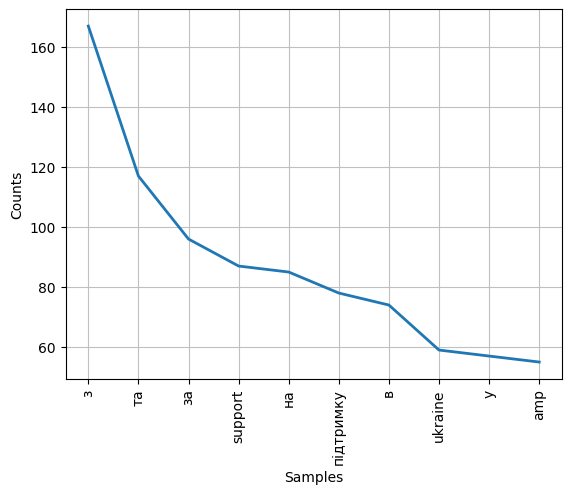

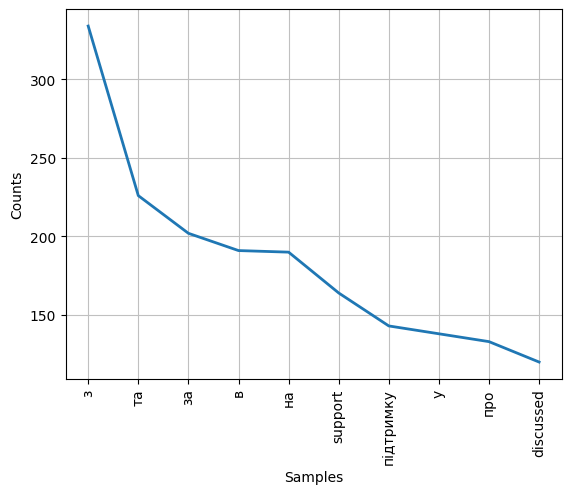

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# import nltk
# nltk.download('nps_chat')
# nltk.download('webtext')
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def tokenize_remove_stop(df):
    big_string = " ".join(df.content)
    big_string = big_string.lower()
    big_string = re.sub("[^\w\s]", "", big_string)
    tokenized = word_tokenize(big_string)
    removed_stop_words = [i for i in tokenized if i not in stop_words]
    return removed_stop_words

# print(all_web_content)
# print("\n\n\n")
tokenized_web = tokenize_remove_stop(web)
tokenized_iphone = tokenize_remove_stop(iphone)


# from googletrans import Translator
# translator = Translator()
# translator.translate('Продовжив діалог із директоркою МВФ @KGeorgiev', src='uk', dest='en')

# Frequency Distribution Plots for web/iphone

In [ ]:
from nltk.book import FreqDist
freqDist = FreqDist(tokenized_web)
freqDist.plot(10)
freqDist = FreqDist(tokenized_iphone)
freqDist.plot(10)

# Word clouds for web and iphone

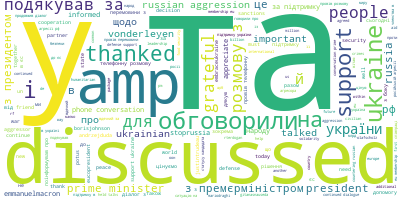

In [18]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(" ".join(tokenized_web))# Visualize the word cloud
wordcloud.to_image()



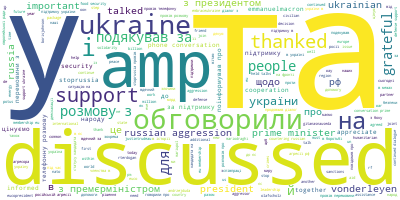

In [19]:
wordcloud.generate(" ".join(tokenized_iphone))# Visualize the word cloud
wordcloud.to_image()

# Post frequencies

Text(0, 0.5, 'Number of tweets')

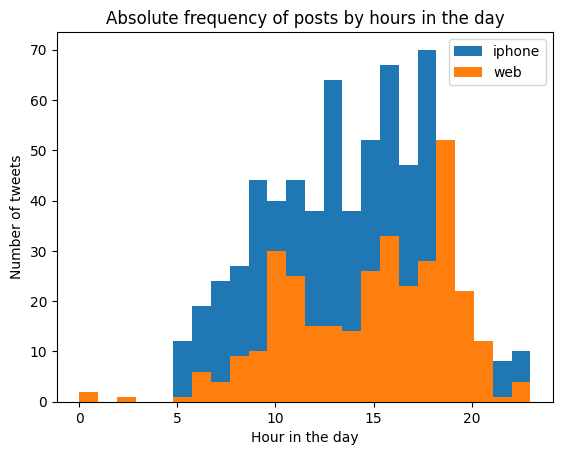

In [54]:
from datetime import datetime
from matplotlib import pyplot as plt
def get_hour_frequency_plot(df):
    hours_frequency = []
    for time in df.date:
        hours_frequency.append(time.hour)
    return plt.hist(hours_frequency, bins=24)

get_hour_frequency_plot(iphone)
get_hour_frequency_plot(web)
plt.legend(["iphone", "web"])
plt.title("Absolute frequency of posts by hours in the day")
plt.xlabel("Hour in the day")
plt.ylabel("Number of tweets")

# Topic modelling
The section below does the topic modelling from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

It makes a .html file that allows you to view the topics

In [29]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(doc):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words]]
# data = papers.paper_text_processed.values.tolist()
# data_words = list(sent_to_words(data))
data_words = [tokenized_web]

import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

print("UP TO MODEL")
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics, workers=1)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]
print("up to visualize")
import os
import pyLDAvis.gensim_models
import pickle
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join("C:\\Users\\adder\\Documents\\Minerva\\CCP Ukraine\\social-media-ukraine\\" + str(num_topics))# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
print(LDAvis_data_filepath)
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, str(num_topics) +'.html')
    LDAvis_prepared

[(0, 1), (1, 1), (2, 3), (3, 1), (4, 12), (5, 2), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 7), (13, 2), (14, 1), (15, 2), (16, 1), (17, 10), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 2)]
UP TO MODEL
[(0,
  '0.014*"з" + 0.011*"та" + 0.008*"за" + 0.007*"на" + 0.007*"в" + '
  '0.007*"support" + 0.006*"amp" + 0.006*"ukraine" + 0.006*"про" + '
  '0.005*"підтримку"'),
 (1,
  '0.021*"з" + 0.012*"та" + 0.009*"за" + 0.009*"support" + 0.008*"на" + '
  '0.008*"в" + 0.007*"підтримку" + 0.006*"рф" + 0.006*"ukraine" + 0.006*"про"'),
 (2,
  '0.014*"з" + 0.010*"та" + 0.010*"support" + 0.009*"за" + 0.008*"на" + '
  '0.008*"підтримку" + 0.007*"ukraine" + 0.006*"в" + 0.006*"у" + '
  '0.006*"discussed"'),
 (3,
  '0.010*"на" + 0.010*"з" + 0.009*"за" + 0.008*"підтримку" + 0.008*"та" + '
  '0.007*"в" + 0.006*"support" + 0.005*"про" + 0.005*"discussed" + 0.005*"у"'),
 (4,
  '0.020*"з" + 0.012*"та" + 0.009*"на" + 0.009*"за" + 0.008*"пі

C:\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
